In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

from tensorflow.keras.preprocessing import image_dataset_from_directory

In [2]:
data_dir = 'fall_dataset/'

batch_size = 32
image_size = (224, 224)


train_ds = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

val_ds = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 537 files belonging to 2 classes.
Using 430 files for training.
Found 537 files belonging to 2 classes.
Using 107 files for validation.


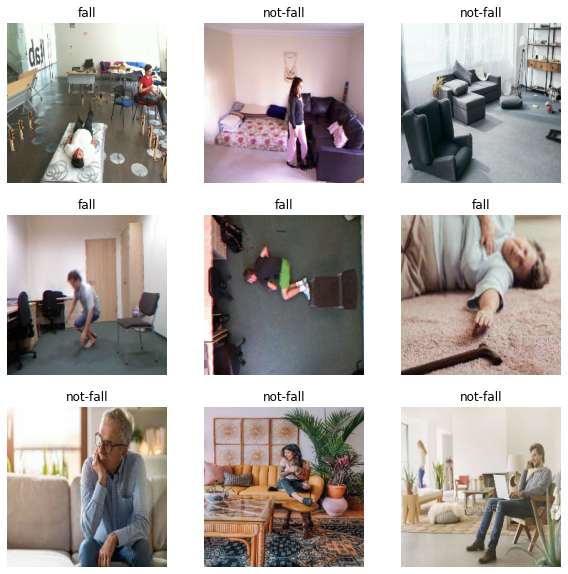

In [3]:
class_names = train_ds.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [4]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

In [5]:
from tensorflow.keras.applications import ResNet50

# Initialize the Pretrained Model
feature_extractor = ResNet50(weights='imagenet', 
                             input_shape=(224, 224, 3),
                             include_top=False)

# Set this parameter to make sure it's not being trained
feature_extractor.trainable = False

# Set the input layer
input_ = tf.keras.Input(shape=(224, 224, 3))

# Set the feature extractor layer
x = feature_extractor(input_, training=False)

# Set the pooling layer
x = tf.keras.layers.GlobalAveragePooling2D()(x)

# Set the final layer with sigmoid activation function
output_ = tf.keras.layers.Dense(2, activation='softmax')(x)

# Create the new model object
model = tf.keras.Model(input_, output_)

# Compile it
model.compile(optimizer='adam',
             loss='SparseCategoricalCrossentropy',
             metrics=['accuracy'])

# Print The Summary of The Model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 2)                 4098      
Total params: 23,591,810
Trainable params: 4,098
Non-trainable params: 23,587,712
_________________________________________________________________


In [6]:
history = model.fit(train_ds,
                    epochs=5,
                    validation_data=val_ds)

Epoch 1/5
14/14 [==============================] - 33s 2s/step - loss: 0.5760 - accuracy: 0.6930 - val_loss: 0.4004 - val_accuracy: 0.8318
Epoch 2/5
14/14 [==============================] - 36s 3s/step - loss: 0.2994 - accuracy: 0.8651 - val_loss: 0.2718 - val_accuracy: 0.9159
Epoch 3/5
14/14 [==============================] - 34s 2s/step - loss: 0.2083 - accuracy: 0.9279 - val_loss: 0.2212 - val_accuracy: 0.9439
Epoch 4/5
14/14 [==============================] - 34s 2s/step - loss: 0.1725 - accuracy: 0.9465 - val_loss: 0.2138 - val_accuracy: 0.9346
Epoch 5/5
14/14 [==============================] - 34s 2s/step - loss: 0.1314 - accuracy: 0.9674 - val_loss: 0.1879 - val_accuracy: 0.9533


In [7]:
model.save('based_saved_model')

INFO:tensorflow:Assets written to: based_saved_model/assets


/home/bhavika/.local/lib/python3.8/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
